# PCA Implementation from scratch

In [1]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

In [2]:
#Importing Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading Data and storing labels in different variable
data=pd.read_csv('train.csv')
data_labels=data['label']

# Drop the label feature from data.
data.drop('label',axis=1,inplace=True)

In [6]:
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_labels

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

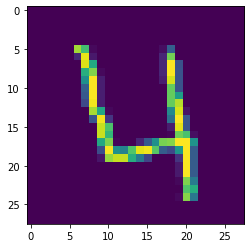

In [10]:
plt.imshow(np.array(data.iloc[3]).reshape(28,28))

In [11]:
# Data-preprocessing: Standardizing the data
sc=StandardScaler()
std_data=sc.fit_transform(data)

In [12]:
std_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
std_data.shape

(42000, 784)

In [14]:
# Covariance Matrix = (X.T * X)/N 
# ie.shape (784 x 42000) * (42000 x 784) = (784 x 784) matrix

covariance_matrix = (np.matmul(std_data.T,std_data))/std_data.shape[0]

In [15]:
covariance_matrix.shape

(784, 784)

In [16]:
# Finding the eigen-values and corresponding eigen-vectors of  covariance_matrix
eig_values,eig_vectors=eig(covariance_matrix)

In [17]:
# We will get 784 eigen values and corresponding eigen vectors of shape (784x784)

eig_vectors.shape

(784, 784)

In [58]:
# vectors[:,0] represents the eigen vector corresponding to the 1st eigen value.(First column in the vectors matrix)
# vectors[:,1] represents the eigen vector correspondign to the 2nd eigen value.(Second column in the vectors matrix)
'''
eg.
a= np.array([[4, 3, 8],
            [9 ,5 ,1],
            [2, 7, 6]])
a.shape 
>>(3, 3)

a[:,0]
>>array([4, 9, 2])
'''
eig_vectors[:,0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.19928945e-04,  1.97228286e-05,  1.91397276e-04,  1.91397276e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.83135818e-04,  6.47441857e-04,  1.62679338e-03,  1.95537283e-03,
        2.74776969e-03,  3.75023065e-03,  4.56880011e-03,  4.15474601e-03,
        2.74718694e-03,  2.42695582e-03,  2.83337270e-03,  1.98778007e-03,
        1.17549167e-03,  5.21190421e-04,  1.96970841e-04,  7.86855737e-05,
       -4.52203347e-06,  7.59191543e-04,  4.88196899e-04, -7.18957771e-06,
        0.00000000e+00,  

In [59]:
# Sorting eigen values and correspondingly sort and map eigen vectors also
sorted_eig_vectors_idx=np.argsort(eig_values)[::-1]

In [60]:
exp_var=list()
for i in np.sort(eig_values)[::-1]:
    ev=i/np.sum(eig_values)
    exp_var.append(ev)

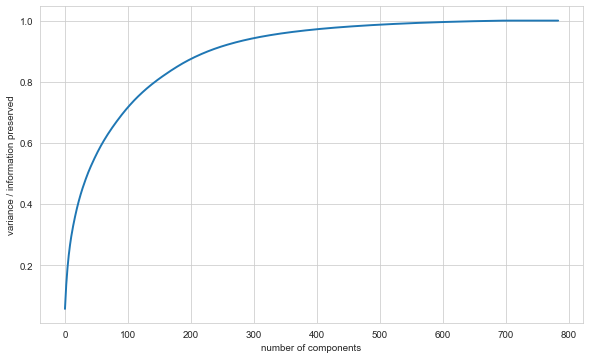

In [61]:
# Calculation variance explained for each component 
# % variance explained / information preserved = ∑λ(number of components) / ∑ λi where λ=eigen values 

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6), dpi=70)
plt.clf()
plt.plot(np.cumsum(exp_var),linewidth=2)
plt.xlabel('number of components')
plt.ylabel('variance / information preserved')
plt.show()

# If we take 200-dimensions/components, approx. 90% of variance is expalined.

In [62]:
# Sorting eigen values and correspondingly sort and map eigen vectors also
# We take 2 components ie. reduce dimensions from 784D to 2D
n_components=2
n_eigen_vectors=eig_vectors[:,sorted_eig_vectors_idx[:n_components]]

In [63]:
n_eigen_vectors.shape

(784, 2)

In [64]:
# Finally creating 2D data by multiplying eigrn vectors with standardized data matrix
# ie. shapes (42000 x 784) * (784 x 2) = (42000, 2)

pca_data=np.matmul(std_data,n_eigen_vectors)

In [65]:
pca_data.shape

(42000, 2)

In [66]:
pca_dataf=pd.DataFrame(pca_data,columns=['component_'+str(i) for i in range(1,n_components+1)])
pca_dataf['labels']=data_labels

In [67]:
pca_dataf

,component_1,component_2,labels
0,-5.140478,-5.226445,1
1,19.292332,6.032996,0
2,-7.644503,-1.705813,1
3,-0.474207,5.836139,4
4,26.559574,6.024818,0
...,...,...,...
41995,13.678849,-1.350366,0
41996,-8.869582,-1.187360,1
41997,0.495391,7.076277,7
41998,2.307240,-4.344513,6


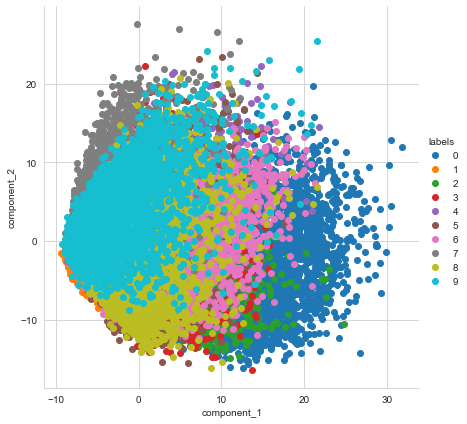

In [68]:
# Plotting changed 2D data

sns.set_style("whitegrid");
sns.FacetGrid(pca_dataf, hue='labels', height=6) \
 .map(plt.scatter, "component_1", "component_2") \
 .add_legend();
plt.show();


## Sklearn's PCA Implementation

In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
skpca_data=pca.fit_transform(std_data)

In [185]:
skpca_data.shape

(42000, 2)

In [186]:
skpca_dataf=pd.DataFrame(skpca_data,columns=['component_'+str(i) for i in range(1,2+1)])
skpca_dataf['labels']=data_labels

In [187]:
skpca_dataf

,component_1,component_2,labels
0,-5.140502,-5.227321,1
1,19.292260,6.033558,0
2,-7.644507,-1.705533,1
3,-0.474240,5.837318,4
4,26.559522,6.024906,0
...,...,...,...
41995,13.678820,-1.349668,0
41996,-8.869582,-1.187039,1
41997,0.495365,7.076536,7
41998,2.307221,-4.343699,6


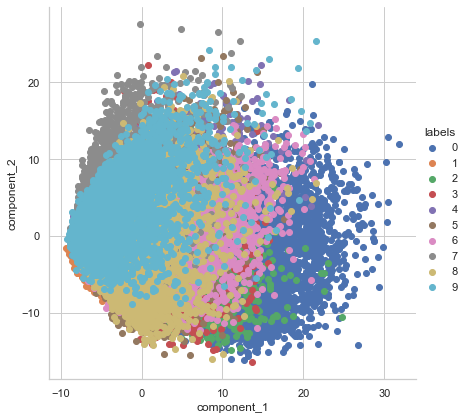

In [188]:
sns.set_style("whitegrid");
sns.FacetGrid(skpca_dataf, hue='labels', height=6) \
 .map(plt.scatter, "component_1", "component_2") \
 .add_legend();
plt.show();
